In [1]:
pip install matplotlib

  Using cached matplotlib-3.4.2-cp38-cp38-manylinux1_x86_64.whl (10.3 MB)
  Using cached Pillow-8.3.1-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (3.0 MB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached kiwisolver-1.3.1-cp38-cp38-manylinux1_x86_64.whl (1.2 MB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install nltk

  Using cached nltk-3.6.2-py3-none-any.whl (1.5 MB)
  Using cached joblib-1.0.1-py3-none-any.whl (303 kB)
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from datetime import date, datetime, timedelta

nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/jovyan/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [7]:
df=pd.read_csv('full_dataset.csv')
df

,Unnamed: 0,index,title,media,date,datetime,desc,link,img
0,0,0,Seattle police release video of fatal shooting...,The Seattle Times,01/01/2019,NaN,"Faletogo died of a gunshot wound to the head, ...",https://www.seattletimes.com/seattle-news/crim...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
1,1,1,Fatal Seattle police shooting will test new ac...,Crosscut,01/01/2019,NaN,Faletogo was stopped by police officers while ...,https://crosscut.com/2019/01/fatal-seattle-pol...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
2,2,2,Seattle Police release body cam footage in fat...,MyNorthwest.com,01/01/2019,NaN,The Seattle Police Department released the bod...,https://mynorthwest.com/1232749/seattle-police...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
3,3,3,Former Seattle police chief Jim Pugel will run...,The Seattle Times,01/01/2019,NaN,More than two dozen candidates are running acr...,https://www.seattletimes.com/seattle-news/poli...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
4,4,4,Judge dismisses claims against 2 Seattle polic...,The Seattle Times,01/01/2019,NaN,"Lyles had a history of contacts with SPD, most...",https://www.seattletimes.com/seattle-news/crim...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
...,...,...,...,...,...,...,...,...,...
13445,1345,85,‘Zero Tolerance For Harassment’: Leaders React...,CBS Philly,08/01/2019,NaN,Philadelphia Police Commissioner Richard Ross ...,https://philadelphia.cbslocal.com/2019/08/20/p...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
13446,1346,86,"After father of 2 killed in Rainier Beach, off...",The Seattle Times,08/01/2019,NaN,He remains in King County Jail in lieu of $5 m...,https://www.seattletimes.com/seattle-news/crim...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
13447,1347,87,The Hardest Job In Philly?,The Philadelphia Citizen,08/01/2019,NaN,"Well, the Philadelphia Police Department needs...",https://thephiladelphiacitizen.org/richard-ros...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."
13448,1348,88,Florida police escort fallen officer's son to ...,KOMO,08/01/2019,NaN,"Missing alongside him, his dad Bill, a Sergean...",https://komonews.com/news/nation-world/florida...,"data:image/gif;base64,R0lGODlhAQABAIAAAP//////..."


In [19]:
#Convert string values in date column to datetime values 
#df['date']=df['date'].apply(lambda x: datetime.strptime(str(x), '%m/%d/%Y'))
df['date'] = pd.to_datetime(df['date'], errors='coerce')

In [22]:
# Drop index and img columns
df = df.drop(['index', 'img', 'datetime'], axis=1)
df

,Unnamed: 0,title,media,date,desc,link
0,0,Seattle police release video of fatal shooting...,The Seattle Times,2019-01-01,"Faletogo died of a gunshot wound to the head, ...",https://www.seattletimes.com/seattle-news/crim...
1,1,Fatal Seattle police shooting will test new ac...,Crosscut,2019-01-01,Faletogo was stopped by police officers while ...,https://crosscut.com/2019/01/fatal-seattle-pol...
2,2,Seattle Police release body cam footage in fat...,MyNorthwest.com,2019-01-01,The Seattle Police Department released the bod...,https://mynorthwest.com/1232749/seattle-police...
3,3,Former Seattle police chief Jim Pugel will run...,The Seattle Times,2019-01-01,More than two dozen candidates are running acr...,https://www.seattletimes.com/seattle-news/poli...
4,4,Judge dismisses claims against 2 Seattle polic...,The Seattle Times,2019-01-01,"Lyles had a history of contacts with SPD, most...",https://www.seattletimes.com/seattle-news/crim...
...,...,...,...,...,...,...
13445,1345,‘Zero Tolerance For Harassment’: Leaders React...,CBS Philly,2019-08-01,Philadelphia Police Commissioner Richard Ross ...,https://philadelphia.cbslocal.com/2019/08/20/p...
13446,1346,"After father of 2 killed in Rainier Beach, off...",The Seattle Times,2019-08-01,He remains in King County Jail in lieu of $5 m...,https://www.seattletimes.com/seattle-news/crim...
13447,1347,The Hardest Job In Philly?,The Philadelphia Citizen,2019-08-01,"Well, the Philadelphia Police Department needs...",https://thephiladelphiacitizen.org/richard-ros...
13448,1348,Florida police escort fallen officer's son to ...,KOMO,2019-08-01,"Missing alongside him, his dad Bill, a Sergean...",https://komonews.com/news/nation-world/florida...


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13450 entries, 0 to 13449
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  13450 non-null  int64         
 1   title       13450 non-null  object        
 2   media       13186 non-null  object        
 3   date        13390 non-null  datetime64[ns]
 4   desc        13450 non-null  object        
 5   link        13450 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 630.6+ KB


In [24]:
#Fill in Missing values in 'media'
df['media']=df.media.fillna('Others')

In [25]:
#Number of unique news sources
len(df.media.unique())

234

In [26]:
#Top 10 news sources
top_10=df.media.value_counts().head(10)
top_10

The Seattle Times       2529
KIRO-TV                 1169
MyNorthwest.com          764
The Spokesman-Review     553
KING 5                   496
The Denver Post          457
KOMO                     452
Crosscut                 366
KUOW                     342
Others                   264
Name: media, dtype: int64

In [27]:
#All Media Sources
df.media.unique()

array(['The Seattle Times', 'Crosscut', 'MyNorthwest.com',
       'Honolulu Civil Beat', 'KUOW', 'Auburn Reporter', 'The Columbian',
       'KING 5', 'KIRO-TV', 'The Spokesman-Review', 'NPR', 'Q13 FOX',
       'Seattle Weekly', 'KUTV', 'CHS Capitol Hill Seattle', 'KRON4',
       'West Seattle Blog...', 'The Tennessean',
       'The Des Moines Register', 'The Denver Post', 'USNews.com',
       'Seattle PI', 'The World', 'The Washington Post', 'iLoveKent',
       'Patch', 'KREM', 'Law & Crime', 'Others', 'Everett Herald',
       'CBS Sacramento', 'Northwest Asian Weekly', 'Real Change',
       'Redmond Reporter', 'Heavy.com', 'KOMO',
       'Northeast Indiana Public Radio', 'ABC News', 'Yahoo News',
       'TXK Today', 'Daily Mail', 'WSTM', 'Go Grays Harbor',
       'New York Post', 'Los Angeles Daily News', 'Fox News', 'KHQ.com',
       'CBS Los Angeles', 'National University', 'WTHR',
       'The Daily Beast', 'Los Angeles Times', 'Kirkland Reporter',
       'The Press Democrat', 'St. 

In [46]:
#Create Local vs national media dictionary 0-local, 1 = national "Others" =0
media_dict = {
    'The Seattle Times': 0, 'Yahoo News':1, 'Cleveland.com':1,
       'West Seattle Blog...':0, 'Port Arthur News':0, 'Others':0, 'NBC News':1,
       'Washington State Wire':0, 'KUOW':0, 'CHS Capitol Hill Seattle':0,
       'KNDU':0, 'Westside Seattle':0, 'PubliCola':0, 'South Seattle Emerald':0,
       'KIRO-TV':0, 'Niners Nation':0, 'Patch':0, 'KOMO':0, 'ESPN':1,
       'Sports Illustrated':1, 'NewsOne':0, 'Seattle PI':0, 'USA Today':1,
       'CBS San Francisco':0, '247 Sports':0, 'Field Gulls':0, 'Sportskeeda':0,
       'Real Change':0, 'Touchdown Wire':0, 'KING 5':0, 'Just The News':0,
       'Hudson Valley Post':0, 'SPD Blotter':0, 'CBS News':1, 'The Stranger':0,
       'Council Connection':0, 'The Hill':1, 'Crosscut':0,  'Q13 FOX':0,
       'The Chronicle':0, 'Kent Reporter':0, 'SiliconANGLE':0,
       'MyNorthwest.com':0, 'The New York Times':1, 'CONAN Daily':0,
       'KING5.com':0, 'KOMO News':0, 'FOX 10 Phoenix':1, 'Fox News':1, 'KIMA':0,
       'Seattle Met':0, 'The Spokesman-Review':0, 'Law Officer':0,
       'Everett Herald':0, 'New York Post':1, 'FOX 5 Atlanta':1, 'Metro Weekly':0,
       'KCTV5':0, 'Wall Street Journal':1, 'KXL':0, 'Liberation News':0,
       'Daily Fly':0, 'Forbes':1, 'Washington Examiner':0, 'Star Tribune':0,
       'My Ballard':0, 'Living Snoqualmie':0, 'Bellevue Reporter':0,
       'Business - Insider':1,'CNN':1, 'WFAA':1, 'Honolulu Civil Beat':1, 'Auburn Reporter':0, 'The Columbian':0,
        'NPR':1,'Seattle Weekly':0,'KUTV':0, 'KRON4':0,'The Tennessean':1,'The Des Moines Register':1, 'The Denver Post':1,
    'USNews.com':1,'The World':1,'The Washington Post':1,'iLoveKent':0,'KREM':0,'Law & Crime':1,'CBS Sacramento':1,
    'Northwest Asian Weekly':0,'Redmond Reporter':1,'Heavy.com':1,'Northeast Indiana Public Radio':1,'ABC News':1,
     'TXK Today':1,'Daily Mail':1,'WSTM':1, 'Go Grays Harbor':0,'Los Angeles Daily News':1, 'KHQ.com':0,'CBS Los Angeles':1,
    'National University':1,'WTHR':1, 'The Daily Beast':1, 'Los Angeles Times':1, 'Kirkland Reporter':1, 
    'The Press Democrat':1,'St. Thomas Source':0,'Tri-City Herald':0, 'The Guam Daily Post':1,'Thrillist':1,
    'Houston Chronicle':1, 'The Economist':1, 'KCRG':0,'Auburn Examiner':1,'WKRG':1,'Gwinnett Daily Post':1,
    'News on 6':0, 'Unmanned Aerial':1,'Renton Reporter':1,'The Business Journals':0,'The Atlanta Journal-Constitution':1,
    'Ellensburg Daily Record':0,'Officer':0, "GeekWire":1,'New Haven Register':1, 'Bangor Daily News':1,'Michigan Radio':1,
    'UPI':1, 'Mercer Island Reporter':0, 'TheHill':1, 'NBC Right Now':1, 'West Seattle Blog…': 0,'Issaquah Reporter': 0,
    'Seattle Spectator': 0, 'Washington Times': 0,  'Vashon Beachcomber': 0



}

In [47]:
for x in df['media']:
    if x not in media_dict:
        media_dict[x]=1
    
df['Local']=[media_dict[x] for x in df['media']]

df.head()

,Unnamed: 0,title,media,date,desc,link,Local
0,0,Seattle police release video of fatal shooting...,The Seattle Times,2019-01-01,"Faletogo died of a gunshot wound to the head, ...",https://www.seattletimes.com/seattle-news/crim...,0
1,1,Fatal Seattle police shooting will test new ac...,Crosscut,2019-01-01,Faletogo was stopped by police officers while ...,https://crosscut.com/2019/01/fatal-seattle-pol...,0
2,2,Seattle Police release body cam footage in fat...,MyNorthwest.com,2019-01-01,The Seattle Police Department released the bod...,https://mynorthwest.com/1232749/seattle-police...,0
3,3,Former Seattle police chief Jim Pugel will run...,The Seattle Times,2019-01-01,More than two dozen candidates are running acr...,https://www.seattletimes.com/seattle-news/poli...,0
4,4,Judge dismisses claims against 2 Seattle polic...,The Seattle Times,2019-01-01,"Lyles had a history of contacts with SPD, most...",https://www.seattletimes.com/seattle-news/crim...,0


In [50]:
df=df[df['Local']==0]
df.head()

,Unnamed: 0,title,media,date,desc,link,Local
0,0,Seattle police release video of fatal shooting...,The Seattle Times,2019-01-01,"Faletogo died of a gunshot wound to the head, ...",https://www.seattletimes.com/seattle-news/crim...,0
1,1,Fatal Seattle police shooting will test new ac...,Crosscut,2019-01-01,Faletogo was stopped by police officers while ...,https://crosscut.com/2019/01/fatal-seattle-pol...,0
2,2,Seattle Police release body cam footage in fat...,MyNorthwest.com,2019-01-01,The Seattle Police Department released the bod...,https://mynorthwest.com/1232749/seattle-police...,0
3,3,Former Seattle police chief Jim Pugel will run...,The Seattle Times,2019-01-01,More than two dozen candidates are running acr...,https://www.seattletimes.com/seattle-news/poli...,0
4,4,Judge dismisses claims against 2 Seattle polic...,The Seattle Times,2019-01-01,"Lyles had a history of contacts with SPD, most...",https://www.seattletimes.com/seattle-news/crim...,0


In [51]:
df.shape

(9608, 7)

In [52]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

#Tokenize and Normalize (standardize) the text by removing all punctuation 
#from 'title' and 'desc' making all text lower case

df.title = df.title.apply(lambda x: nltk.RegexpTokenizer(r"\w+").tokenize(x.lower()))
df.desc = df.desc.apply(lambda x: nltk.RegexpTokenizer(r"\w+").tokenize(x.lower()))

/opt/conda/lib/python3.8/site-packages/pandas/core/generic.py:5494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [53]:
#extend list of stopwords to include search terms
stopwords = nltk.corpus.stopwords.words('english')
newStopWords = ['police','seattle', 'spd', 'department', 'officer', 'officers','dependable',
'professional','respectful','delivering','quality','enforces','prevents']
stopwords.extend(newStopWords)

In [54]:
#Remove Stop words from the text
df.title = df.title.apply(lambda x: [word for word in x if word not in stopwords])
df.desc = df.desc.apply(lambda x: [word for word in x if word not in stopwords])


In [55]:
#Lemmatize text to normalize 
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

df.title = df.title.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
df.desc = df.desc.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

In [56]:
#create trigram from tokenized list
from nltk.util import ngrams
def ngramconvert(df,n=3):
    for item in df[['title', 'desc']].columns:
        df['newtri'+item]=df[item].apply(lambda token_list: list(ngrams(token_list, n)))
    return df

In [57]:
ngramconvert(df, n=3)

<ipython-input-56-e2f044128ccd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['newtri'+item]=df[item].apply(lambda token_list: list(ngrams(token_list, n)))


,Unnamed: 0,title,media,date,desc,link,Local,newtrititle,newtridesc
0,0,"[release, video, fatal, shooting, new, year, eve]",The Seattle Times,2019-01-01,"[faletogo, died, gunshot, wound, head, medical...",https://www.seattletimes.com/seattle-news/crim...,0,"[(release, video, fatal), (video, fatal, shoot...","[(faletogo, died, gunshot), (died, gunshot, wo..."
1,1,"[fatal, shooting, test, new, accountability, law]",Crosscut,2019-01-01,"[faletogo, stopped, driving, new, year, eve, a...",https://crosscut.com/2019/01/fatal-seattle-pol...,0,"[(fatal, shooting, test), (shooting, test, new...","[(faletogo, stopped, driving), (stopped, drivi..."
2,2,"[release, body, cam, footage, fatal, aurora, a...",MyNorthwest.com,2019-01-01,"[released, body, cam, footage, involving, car,...",https://mynorthwest.com/1232749/seattle-police...,0,"[(release, body, cam), (body, cam, footage), (...","[(released, body, cam), (body, cam, footage), ..."
3,3,"[former, chief, jim, pugel, run, city, council]",The Seattle Times,2019-01-01,"[two, dozen, candidate, running, across, seven...",https://www.seattletimes.com/seattle-news/poli...,0,"[(former, chief, jim), (chief, jim, pugel), (j...","[(two, dozen, candidate), (dozen, candidate, r..."
4,4,"[judge, dismisses, claim, 2, fatal, shooting, ...",The Seattle Times,2019-01-01,"[lyles, history, contact, call, report, domest...",https://www.seattletimes.com/seattle-news/crim...,0,"[(judge, dismisses, claim), (dismisses, claim,...","[(lyles, history, contact), (history, contact,..."
...,...,...,...,...,...,...,...,...,...
13441,1341,"[sends, tone, deaf, response, pioneer, square,...",MyNorthwest.com,2019-08-01,"[tired, minimal, result, knew, would, come, ca...",https://mynorthwest.com/1472518/dori-collins-p...,0,"[(sends, tone, deaf), (tone, deaf, response), ...","[(tired, minimal, result), (minimal, result, k..."
13442,1342,"[commission, renews, spokane, ombudsman, bart,...",The Spokesman-Review,2019-08-01,"[bart, logue, civilian, watchdog, spokane, thr...",https://www.spokesman.com/stories/2019/aug/13/...,0,"[(commission, renews, spokane), (renews, spoka...","[(bart, logue, civilian), (logue, civilian, wa..."
13444,1344,"[sheriff, body, cam, high, priority, list]",The Columbian,2019-08-01,"[bar, using, real, time, facial, recognition, ...",https://www.columbian.com/news/2019/aug/18/she...,0,"[(sheriff, body, cam), (body, cam, high), (cam...","[(bar, using, real), (using, real, time), (rea..."
13446,1346,"[father, 2, killed, rainier, beach, official, ...",The Seattle Times,2019-08-01,"[remains, king, county, jail, lieu, 5, million...",https://www.seattletimes.com/seattle-news/crim...,0,"[(father, 2, killed), (2, killed, rainier), (k...","[(remains, king, county), (king, county, jail)..."


In [58]:
from nltk.probability import FreqDist

#Initialize FreqDist objects
fdist_title = FreqDist()
fdist_desc = FreqDist()

#Measure of the frequency of words in the 'title' column
for lists_ in df['title']:
    for words in lists_:
        fdist_title[words]+=1
        
title_word_freq = pd.Series(fdist_title, name='freq_title').sort_values(ascending=False)

#Measure of the frequency of words in the 'desc' column
for lists_ in df['desc']:
    for words in lists_:
        fdist_desc[words]+=1
        
desc_word_freq = pd.Series(fdist_desc, name='freq_desc').sort_values(ascending=False)


In [59]:
#Calculating the top 50 words 
word_freq_table = pd.DataFrame(desc_word_freq).join(title_word_freq)

#word_freq_table['freq_total']= word_freq_table['freq_desc']+word_freq_table['freq_title']
word_freq_table = word_freq_table.fillna(int(0))
word_freq_table.head(20).sort_values(by=['freq_desc','freq_title'], ascending=False)

,freq_desc,freq_title
said,1616,8.0
year,1244,546.0
according,985,30.0
man,921,1470.0
city,726,609.0
old,725,340.0
say,703,466.0
shooting,571,989.0
new,568,399.0
spokane,555,309.0


In [60]:
#Trigram for news headlines
trigram_list =[]

for trigrams_ in df['newtrititle']:
    trigram_list.append(trigrams_)
trigram_headlines =pd.DataFrame(trigram_list)
trigram_headlines

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,"(release, video, fatal)","(video, fatal, shooting)","(fatal, shooting, new)","(shooting, new, year)","(new, year, eve)",None,None,None,None,None,None,None,None,None
1,"(fatal, shooting, test)","(shooting, test, new)","(test, new, accountability)","(new, accountability, law)",None,None,None,None,None,None,None,None,None,None
2,"(release, body, cam)","(body, cam, footage)","(cam, footage, fatal)","(footage, fatal, aurora)","(fatal, aurora, ave)","(aurora, ave, north)","(ave, north, shooting)",None,None,None,None,None,None,None
3,"(former, chief, jim)","(chief, jim, pugel)","(jim, pugel, run)","(pugel, run, city)","(run, city, council)",None,None,None,None,None,None,None,None,None
4,"(judge, dismisses, claim)","(dismisses, claim, 2)","(claim, 2, fatal)","(2, fatal, shooting)","(fatal, shooting, charleena)","(shooting, charleena, lyles)",None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9603,"(sends, tone, deaf)","(tone, deaf, response)","(deaf, response, pioneer)","(response, pioneer, square)","(pioneer, square, collins)","(square, collins, pub)","(collins, pub, assault)",None,None,None,None,None,None,None
9604,"(commission, renews, spokane)","(renews, spokane, ombudsman)","(spokane, ombudsman, bart)","(ombudsman, bart, logue)","(bart, logue, contract)",None,None,None,None,None,None,None,None,None
9605,"(sheriff, body, cam)","(body, cam, high)","(cam, high, priority)","(high, priority, list)",None,None,None,None,None,None,None,None,None,None
9606,"(father, 2, killed)","(2, killed, rainier)","(killed, rainier, beach)","(rainier, beach, official)","(beach, official, charge)","(official, charge, man)","(charge, man, say)","(man, say, intimidated)","(say, intimidated, bar)","(intimidated, bar, patron)","(bar, patron, gun)",None,None,None


In [61]:
trigram_headlines =trigram_headlines.stack()

In [62]:
trigram_headlines =pd.DataFrame(trigram_headlines)
trigram_headlines.columns = ['trigram_headlines']
trigram_headlines=trigram_headlines.reset_index().drop(['level_0', 'level_1'], axis=1)
trigram_headlines= trigram_headlines[trigram_headlines['trigram_headlines']!='None']

In [63]:
trigram_headlines.value_counts().head(30)

trigram_headlines                   
(chinatown, international, district)    82
(cal, anderson, park)                   62
(year, old, girl)                       57
(running, city, council)                56
(chief, john, diaz)                     54
(former, chief, john)                   54
(lake, city, shooting)                  53
(year, old, woman)                      52
(3, year, old)                          42
(cold, case, murder)                    40
(dismisses, defamation, lawsuit)        38
(reinstating, punched, handcuffed)      38
(brutal, murder, comment)               38
(2, brutal, murder)                     38
(defamation, lawsuit, kshama)           38
(kshama, sawant, filed)                 38
(lawsuit, kshama, sawant)               38
(filed, 2, brutal)                      38
(judge, dismisses, defamation)          38
(rule, reinstating, punched)            38
(sawant, filed, 2)                      38
(seahawks, jarran, reed)                37
(13, year, old)  

In [64]:
#Trigram for news article summaries
trigram_sumlist =[]

for trigrams_ in df['newtridesc']:
    trigram_sumlist.append(trigrams_)
trigram_summaries =pd.DataFrame(trigram_sumlist)
trigram_summaries

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,"(faletogo, died, gunshot)","(died, gunshot, wound)","(gunshot, wound, head)","(wound, head, medical)","(head, medical, examiner)","(medical, examiner, office)","(examiner, office, said)","(office, said, force)","(said, force, investigation)","(force, investigation, team)","(investigation, team, investigating)","(team, investigating, shooting)",None,None,None,None,None,None,None,None
1,"(faletogo, stopped, driving)","(stopped, driving, new)","(driving, new, year)","(new, year, eve)","(year, eve, according)","(eve, according, post)","(according, post, thursday)","(post, thursday, evening)","(thursday, evening, pulled)",None,None,None,None,None,None,None,None,None,None,None
2,"(released, body, cam)","(body, cam, footage)","(cam, footage, involving)","(footage, involving, car)","(involving, car, across)","(car, across, aurora)","(across, aurora, avenue)","(aurora, avenue, north)","(avenue, north, chased)","(north, chased, three)",None,None,None,None,None,None,None,None,None,None
3,"(two, dozen, candidate)","(dozen, candidate, running)","(candidate, running, across)","(running, across, seven)","(across, seven, district)","(seven, district, month)","(district, month, still)","(month, still, go)","(still, go, may)","(go, may, filing)","(may, filing, deadline)","(filing, deadline, pugel)","(deadline, pugel, joined)",None,None,None,None,None,None,None
4,"(lyles, history, contact)","(history, contact, call)","(contact, call, report)","(call, report, domestic)","(report, domestic, dispute)","(domestic, dispute, violence)","(dispute, violence, neither)","(violence, neither, anderson)","(neither, anderson, mcnew)",None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9603,"(tired, minimal, result)","(minimal, result, knew)","(result, knew, would)","(knew, would, come)","(would, come, calling)","(come, calling, howard)","(calling, howard, tried)","(howard, tried, different)","(tried, different, approach)","(different, approach, reached)",None,None,None,None,None,None,None,None,None,None
9604,"(bart, logue, civilian)","(logue, civilian, watchdog)","(civilian, watchdog, spokane)","(watchdog, spokane, three)","(spokane, three, year)","(three, year, glowing)","(year, glowing, praise)","(glowing, praise, office)","(praise, office, ombudsman)",None,None,None,None,None,None,None,None,None,None,None
9605,"(bar, using, real)","(using, real, time)","(real, time, facial)","(time, facial, recognition)","(facial, recognition, body)","(recognition, body, camera)","(body, camera, video)","(camera, video, privacy)","(video, privacy, activist)","(privacy, activist, concerned)",None,None,None,None,None,None,None,None,None,None
9606,"(remains, king, county)","(king, county, jail)","(county, jail, lieu)","(jail, lieu, 5)","(lieu, 5, million)","(5, million, bail)","(million, bail, according)","(bail, according, jail)","(according, jail, record)","(jail, record, derrick)","(record, derrick, holland)",None,None,None,None,None,None,None,None,None


In [65]:
trigram_summaries =trigram_summaries.stack()

In [66]:
trigram_summaries =pd.DataFrame(trigram_summaries)
trigram_summaries.columns = ['trigram_news_summaries']
trigram_summaries=trigram_summaries.reset_index().drop(['level_0', 'level_1'], axis=1)
trigram_summaries= trigram_summaries[trigram_summaries['trigram_news_summaries']!='None']

In [67]:
trigram_summaries.value_counts().head(30)

trigram_news_summaries              
(year, old, man)                        128
(county, sheriff, office)               114
(body, camera, footage)                  87
(king, county, sheriff)                  78
(mayor, jenny, durkan)                   74
(new, year, eve)                         74
(released, body, camera)                 67
(harborview, medical, center)            64
(36, year, old)                          63
(chief, carmen, best)                    60
(body, cam, footage)                     57
(career, patrol, 1980)                   55
(old, iosia, faletogo)                   55
(year, old, iosia)                       55
(began, career, patrol)                  55
(handling, bias, incident)               53
(community, policing, plan)              53
(bias, incident, home)                   53
(incident, home, depot)                  53
(investigating, handling, bias)          53
(micro, community, policing)             53
(asking, public, help)                 

An analysis of the trigram_summaries results (shown above) and the word frequency distribution table for the news sumarries indicates that there is a set a text that appears repeatedly for 2,254 times and it contains text. 

Upon further investigation, we were able to identify the source text on the Seattle Police Department's website:

"The Seattle Police Department (SPD) prevents crime, enforces laws, and supports quality public safety by delivering respectful, professional, and dependable police services. SPD operates within a framework that divides the city into five geographical areas called "precincts". These precincts define east, west, north, south, and southwest patrol areas, with a police station in each."

This means that 2,254 articles in the dataset are coming from SPD or from a https://www.seattle.gov/police site which have the above text at the bottom of those pages.)



In [68]:
#Save clean, preprocessed dataframe to csv
df.to_csv('news_clean_tokens.csv', index=False)

In [69]:
pip install wordcloud

  Using cached wordcloud-1.8.1-cp38-cp38-manylinux1_x86_64.whl (371 kB)
Note: you may need to restart the kernel to use updated packages.


In [70]:
pip install pillow

Note: you may need to restart the kernel to use updated packages.


In [71]:

from wordcloud import WordCloud

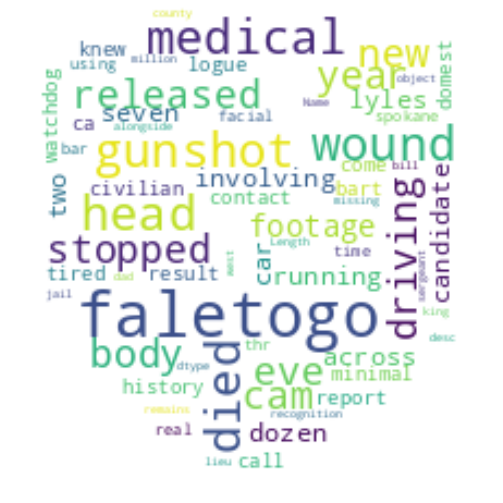

In [72]:
import numpy as np
from PIL import Image

# Create and generate a word cloud image:
spd_mask = np.array(Image.open('spd.jpg'))
wc = WordCloud(background_color='white',mask=spd_mask, max_words=500)

# for News summaries
wc.generate(str(df.desc))


# Display the generated image:
plt.figure(figsize = (16,9))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

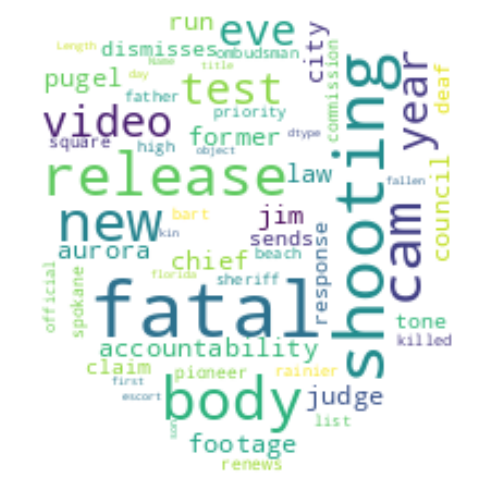

In [73]:
#For News Headlines
wc.generate(str(df.title))


# Display the generated image:
plt.figure(figsize = (16,9))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [74]:
df.title[0]

['release', 'video', 'fatal', 'shooting', 'new', 'year', 'eve']

## Topic Modeling 

In [75]:
pip install pyLDAvis

  Using cached pyLDAvis-3.3.1-py2.py3-none-any.whl
  Using cached scikit_learn-0.24.2-cp38-cp38-manylinux2010_x86_64.whl (24.9 MB)
  Using cached funcy-1.16-py2.py3-none-any.whl (32 kB)
  Using cached numexpr-2.7.3-cp38-cp38-manylinux2010_x86_64.whl (473 kB)
  Using cached sklearn-0.0-py2.py3-none-any.whl
  Using cached scipy-1.7.0-cp38-cp38-manylinux_2_5_x86_64.manylinux1_x86_64.whl (28.4 MB)
  Using cached gensim-4.0.1-cp38-cp38-manylinux1_x86_64.whl (23.9 MB)
  Using cached smart_open-5.1.0-py3-none-any.whl (57 kB)
  Using cached threadpoolctl-2.2.0-py3-none-any.whl (12 kB)
Note: you may need to restart the kernel to use updated packages.


In [76]:
#for LDA
import pyLDAvis


# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

/opt/conda/lib/python3.8/site-packages/scipy/sparse/sparsetools.py:21: DeprecationWarning: `scipy.sparse.sparsetools` is deprecated!
scipy.sparse.sparsetools is a private module for scipy.sparse, and should not be used.
  _deprecated()


In [77]:
df_topic =df[['title', 'media', 'desc']]
df_topic.head()

,title,media,desc
0,"[release, video, fatal, shooting, new, year, eve]",The Seattle Times,"[faletogo, died, gunshot, wound, head, medical..."
1,"[fatal, shooting, test, new, accountability, law]",Crosscut,"[faletogo, stopped, driving, new, year, eve, a..."
2,"[release, body, cam, footage, fatal, aurora, a...",MyNorthwest.com,"[released, body, cam, footage, involving, car,..."
3,"[former, chief, jim, pugel, run, city, council]",The Seattle Times,"[two, dozen, candidate, running, across, seven..."
4,"[judge, dismisses, claim, 2, fatal, shooting, ...",The Seattle Times,"[lyles, history, contact, call, report, domest..."


In [78]:
# Create Dictionary
headline_dictionary = corpora.Dictionary(df_topic.title)

# Create Corpus
headline_texts = df_topic['title']

# Term Document Frequency
corpus = [headline_dictionary.doc2bow(text) for text in headline_texts]


In [79]:
# Create Dictionary
summary_dictionary = corpora.Dictionary(df_topic.title)

# Create Corpus
summary_texts = df_topic['desc']

# Term Document Frequency
corpus_sum = [summary_dictionary.doc2bow(text) for text in summary_texts]


In [80]:
# number of topics
num_topics = 10

# Build LDA model for headlines
lda_model_headline = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=headline_dictionary,
                                       num_topics=num_topics,
                                       random_state =42)

In [ ]:
# number of topics
num_topics = 10

# Build LDA model for summaries
lda_model_summary = gensim.models.LdaMulticore(corpus=corpus_sum,
                                       id2word=summary_dictionary,
                                       num_topics=num_topics,
                                       random_state =42)

In [ ]:
from pprint import pprint

In [ ]:
pprint(lda_model_headline.print_topics())
doc_lda_headline = lda_model_headline[corpus]

In [ ]:
pprint(lda_model_summary.print_topics())
doc_lda_summary = lda_model_summary[corpus_sum]